In [1]:
from asyncore import read
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

C:\Users\Nuchtu\AppData\Local\Temp\ipykernel_18256\3640900120.py:1: DeprecationWarning: The asyncore module is deprecated and will be removed in Python 3.12. The recommended replacement is asyncio
  from asyncore import read


In [2]:
rd = pd.read_csv('Data_example.csv', encoding = 'ISO-8859-1')
rd = pd.DataFrame(rd)
print(rd)

       X     Y        Z
0     19  1927      cat
1    NaN  2300      dog
2     15   NaN     bird
3     16  5959      cat
4     16    AB      cat
5    NaN  4594      dog
6     19  1927      cat
7     20  2879  birdËÁÒ
8     21   NaN      NaN
9      0  4096      cat
10     A  6730      cat
11    25     0     bird
12     0  2792      dog
13    33  2575    dog¹¡
14  1000  4959     bird
15    19  1927      cat
16    36  4580      dog
17    40  5869      NaN
18   NaN  4178      dog
19    45   NaN      cat


In [3]:
rd['X'].replace({r'[a-zA-Z]+':np.nan}, regex = True, inplace  = True)
rd['Y'].replace({r'[a-zA-Z]+':np.nan}, regex = True, inplace  = True)
rd['Z'].replace({r'[^\00-\x7f]+':''}, regex = True, inplace = True)

In [4]:
rd = rd.convert_dtypes()
rd["X"] = pd.to_numeric(rd["X"], errors = 'coerce')
rd["Y"] = pd.to_numeric(rd["Y"], errors = 'coerce')
rd["X"] = rd["X"].astype('Int64')
rd["Y"] = rd["Y"].astype('Float64')
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       16 non-null     Int64  
 1   Y       16 non-null     Float64
 2   Z       18 non-null     string 
dtypes: Float64(1), Int64(1), string(1)
memory usage: 648.0 bytes


In [5]:
rd.drop_duplicates(inplace = True)
print(rd.describe())
print(rd)

                 X           Y
count    14.000000    14.00000
mean     91.857143  3817.00000
std     261.717069  1837.61074
min       0.000000     0.00000
25%      16.000000  2629.25000
50%      20.500000  4137.00000
75%      35.250000  4867.75000
max    1000.000000  6730.00000
       X       Y     Z
0     19  1927.0   cat
1   <NA>  2300.0   dog
2     15    <NA>  bird
3     16  5959.0   cat
4     16    <NA>   cat
5   <NA>  4594.0   dog
7     20  2879.0  bird
8     21    <NA>  <NA>
9      0  4096.0   cat
10  <NA>  6730.0   cat
11    25     0.0  bird
12     0  2792.0   dog
13    33  2575.0   dog
14  1000  4959.0  bird
16    36  4580.0   dog
17    40  5869.0  <NA>
18  <NA>  4178.0   dog
19    45    <NA>   cat


In [6]:
rd["X"] = rd["X"].astype('Float64')
rd['X'].fillna(rd['X'].median(), inplace = True)
rd['Y'].fillna(rd['Y'].median(), inplace = True)
rd['Z'].fillna(value = rd['Z'].mode()[0], inplace=True)
print(rd)
print(rd.describe())

         X       Y     Z
0     19.0  1927.0   cat
1     20.5  2300.0   dog
2     15.0  4137.0  bird
3     16.0  5959.0   cat
4     16.0  4137.0   cat
5     20.5  4594.0   dog
7     20.0  2879.0  bird
8     21.0  4137.0   cat
9      0.0  4096.0   cat
10    20.5  6730.0   cat
11    25.0     0.0  bird
12     0.0  2792.0   dog
13    33.0  2575.0   dog
14  1000.0  4959.0  bird
16    36.0  4580.0   dog
17    40.0  5869.0   cat
18    20.5  4178.0   dog
19    45.0  4137.0   cat
                X            Y
count    18.00000    18.000000
mean     76.00000  3888.111111
std     230.89175  1612.764338
min       0.00000     0.000000
25%      16.75000  2813.750000
50%      20.50000  4137.000000
75%      31.00000  4590.500000
max    1000.00000  6730.000000


<AxesSubplot:>

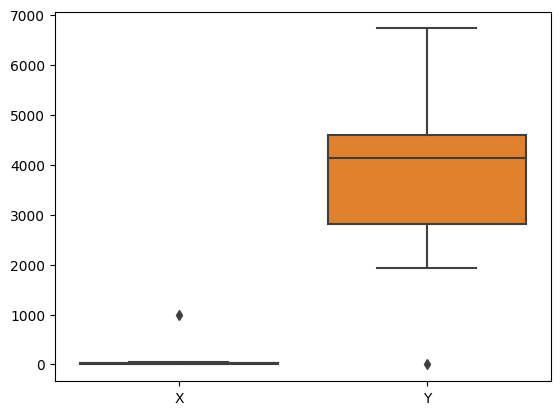

In [7]:
import seaborn as sns
sns.boxplot(data=rd)

In [8]:
df = rd
scaler = StandardScaler()
df[['X','Y']] = scaler.fit_transform(df[['X','Y']])
print(df)

           X         Y     Z
0  -0.254026 -1.251247   cat
1  -0.247341 -1.013262   dog
2  -0.271852  0.158798  bird
3  -0.267396  1.321289   cat
4  -0.267396  0.158798   cat
5  -0.247341  0.450378   dog
7  -0.249569 -0.643843  bird
8  -0.245113  0.158798   cat
9  -0.338701  0.132639   cat
10 -0.247341  1.813209   cat
11 -0.227286 -2.480730  bird
12 -0.338701 -0.699351   dog
13 -0.191634 -0.837804   dog
14  4.117896  0.683259  bird
16 -0.178264  0.441446   dog
17 -0.160437  1.263866   cat
18 -0.247341  0.184958   dog
19 -0.138155  0.158798   cat


<AxesSubplot:>

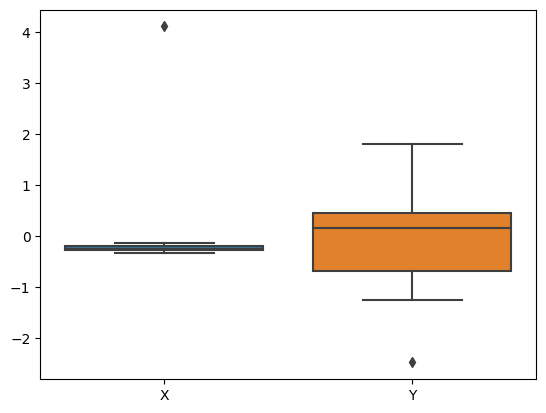

In [9]:
import seaborn as sns
sns.boxplot(data=df)

In [10]:
rd.loc[rd['X'] < -3,'X'] = np.nan
rd.loc[rd['X'] > 3,'X'] = np.nan
rd.loc[rd['Y'] < -3,'Y'] = np.nan
rd.loc[rd['Y'] > 3,'Y'] = np.nan
print(rd)

           X         Y     Z
0  -0.254026 -1.251247   cat
1  -0.247341 -1.013262   dog
2  -0.271852  0.158798  bird
3  -0.267396  1.321289   cat
4  -0.267396  0.158798   cat
5  -0.247341  0.450378   dog
7  -0.249569 -0.643843  bird
8  -0.245113  0.158798   cat
9  -0.338701  0.132639   cat
10 -0.247341  1.813209   cat
11 -0.227286 -2.480730  bird
12 -0.338701 -0.699351   dog
13 -0.191634 -0.837804   dog
14       NaN  0.683259  bird
16 -0.178264  0.441446   dog
17 -0.160437  1.263866   cat
18 -0.247341  0.184958   dog
19 -0.138155  0.158798   cat


In [11]:
rd.dropna(inplace=True)
print(rd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       17 non-null     float64
 1   Y       17 non-null     float64
 2   Z       17 non-null     string 
dtypes: float64(2), string(1)
memory usage: 544.0 bytes
None


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['X','Y']] = scaler.fit_transform(df[['X','Y']])
print(df)

           X         Y     Z
0   0.422222  0.286330   cat
1   0.455556  0.341753   dog
2   0.333333  0.614710  bird
3   0.355556  0.885438   cat
4   0.355556  0.614710   cat
5   0.455556  0.682615   dog
7   0.444444  0.427786  bird
8   0.466667  0.614710   cat
9   0.000000  0.608618   cat
10  0.455556  1.000000   cat
11  0.555556  0.000000  bird
12  0.000000  0.414859   dog
13  0.733333  0.382615   dog
16  0.800000  0.680535   dog
17  0.888889  0.872065   cat
18  0.455556  0.620802   dog
19  1.000000  0.614710   cat


<AxesSubplot:>

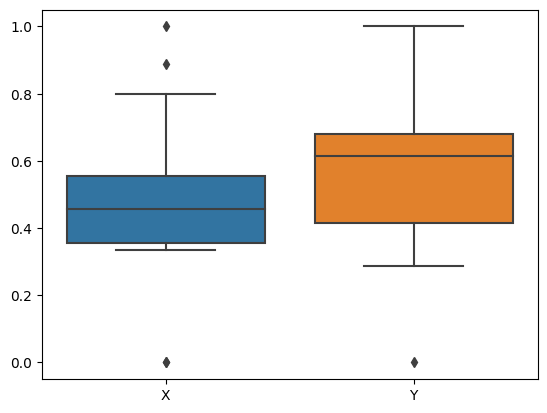

In [13]:
sns.boxplot(data=rd)